In [2]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
import joblib

In [3]:
# Load the dataset (update the filename accordingly)
df = pd.read_csv("D:\\smart irrigation\\irrigation_machine.csv")


In [4]:
# first 5 rows to be printed, df.tail()
df.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [6]:
df.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [7]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [8]:
df.describe() # Statistics of the dataset

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,1.901000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,1.518668,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,2.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,3.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,9.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [9]:
# -------------------------------
# STEP 2: DEFINE FEATURES AND LABELS
# -------------------------------

X = df.iloc[:, 0:20]   # This gives you columns 0 to 19 (sensor_0 to sensor_19)


y = df.iloc[:, 20:]

In [10]:
X.sample(10)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
1218,3.0,3.0,3.0,1.0,6.0,3.0,3.0,6.0,4.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,0.0,3.0,1.0
1101,2.0,2.0,5.0,2.0,3.0,2.0,7.0,0.0,3.0,3.0,1.0,4.0,5.0,0.0,6.0,2.0,2.0,4.0,4.0,2.0
814,1.0,2.0,2.0,1.0,2.0,1.0,4.0,2.0,0.0,2.0,1.0,7.0,2.0,2.0,7.0,0.0,4.0,0.0,2.0,1.0
386,0.0,1.0,1.0,1.0,4.0,3.0,6.0,1.0,4.0,2.0,2.0,3.0,8.0,2.0,0.0,0.0,1.0,1.0,3.0,1.0
1793,1.0,2.0,4.0,2.0,1.0,1.0,6.0,6.0,0.0,2.0,1.0,7.0,5.0,3.0,2.0,0.0,3.0,1.0,0.0,2.0
922,0.0,1.0,3.0,1.0,3.0,0.0,5.0,4.0,1.0,1.0,6.0,3.0,4.0,1.0,4.0,2.0,5.0,1.0,0.0,0.0
1909,0.0,0.0,4.0,4.0,1.0,1.0,3.0,6.0,1.0,4.0,6.0,6.0,4.0,3.0,4.0,2.0,0.0,0.0,1.0,3.0
453,2.0,1.0,1.0,8.0,1.0,0.0,2.0,5.0,0.0,1.0,4.0,4.0,7.0,2.0,1.0,0.0,2.0,0.0,4.0,0.0
489,0.0,1.0,1.0,1.0,2.0,0.0,1.0,7.0,0.0,1.0,3.0,4.0,3.0,5.0,1.0,2.0,4.0,0.0,1.0,3.0
1061,4.0,0.0,1.0,1.0,2.0,1.0,3.0,7.0,0.0,4.0,4.0,8.0,5.0,1.0,4.0,2.0,3.0,3.0,1.0,3.0


In [11]:
y.sample(10)

,parcel_0,parcel_1,parcel_2
415,0,1,0
1804,1,1,1
1479,0,1,0
699,1,1,1
1485,1,1,1
1132,0,1,0
1043,1,1,1
641,0,0,0
893,1,1,0
484,0,1,0


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [14]:
X

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0,0.0,6.0,2.0
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,3.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,1.0,0.0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,0.0,2.0,0.0,3.0,0.0


In [15]:
X.shape, y.shape

((2000, 20), (2000, 3))

In [16]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 sensor_0     0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
parcel_0     0
parcel_1     0
parcel_2     0
dtype: int64


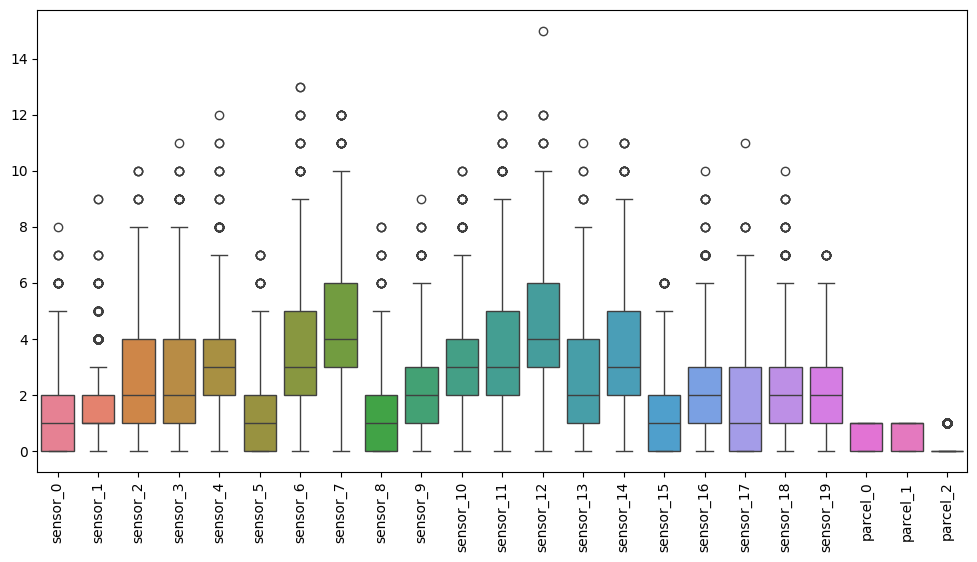

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to see outliers visually
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])


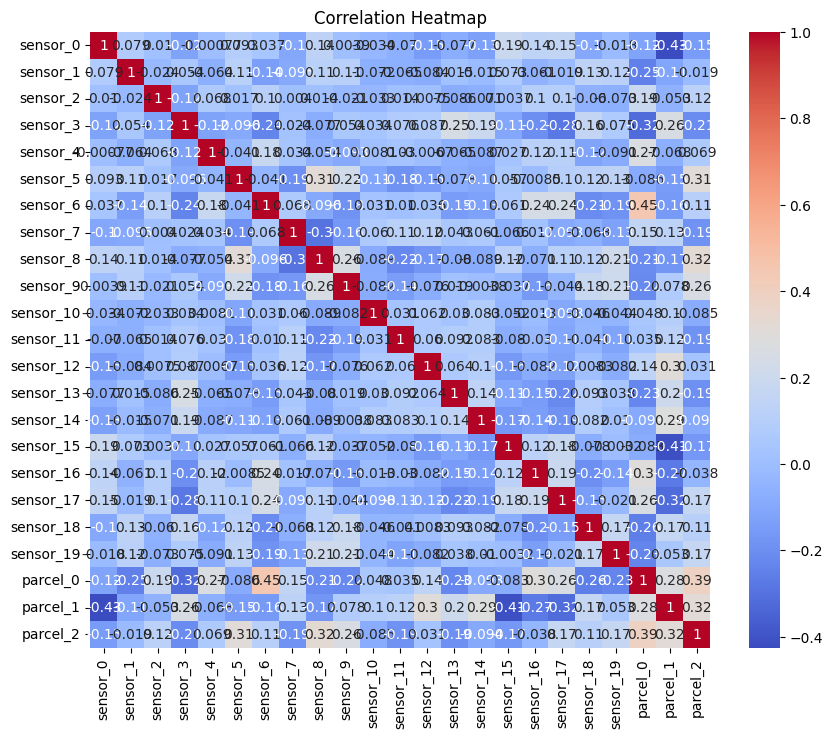

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
df_scaled = pd.DataFrame(scaled_features, columns=df.select_dtypes(include=['float64', 'int64']).columns)


In [21]:
print(df.columns)


Index(['sensor_0', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'parcel_0',
       'parcel_1', 'parcel_2'],
      dtype='object')


In [22]:
# Assume sensor_0 represents 'moisture' sensor
def moisture_category(value):
    if value < 30:
        return 'Low'
    elif value < 60:
        return 'Medium'
    else:
        return 'High'

df['Moisture_Level'] = df['sensor_0'].apply(moisture_category)


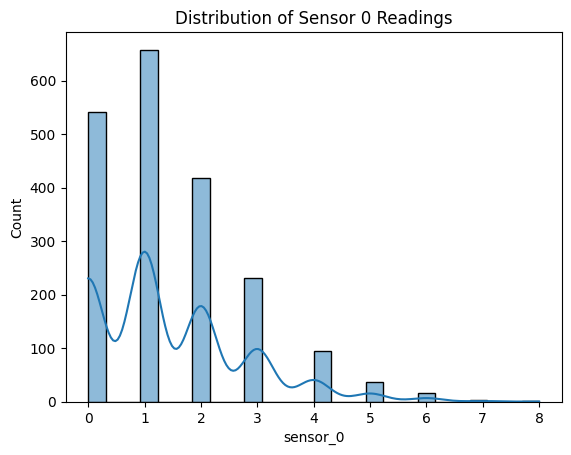

In [23]:
# Plot the distribution of values for one sensor, e.g., sensor_0
sns.histplot(df['sensor_0'], kde=True)
plt.title('Distribution of Sensor 0 Readings')
plt.show()


In [25]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()


Number of duplicate rows: 0


In [26]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print(f"Columns with constant values: {constant_columns}")


Columns with constant values: ['Moisture_Level']


In [27]:
from sklearn.preprocessing import StandardScaler
sensor_cols = [col for col in df.columns if 'sensor' in col]

scaler = StandardScaler()
df[sensor_cols] = scaler.fit_transform(df[sensor_cols])


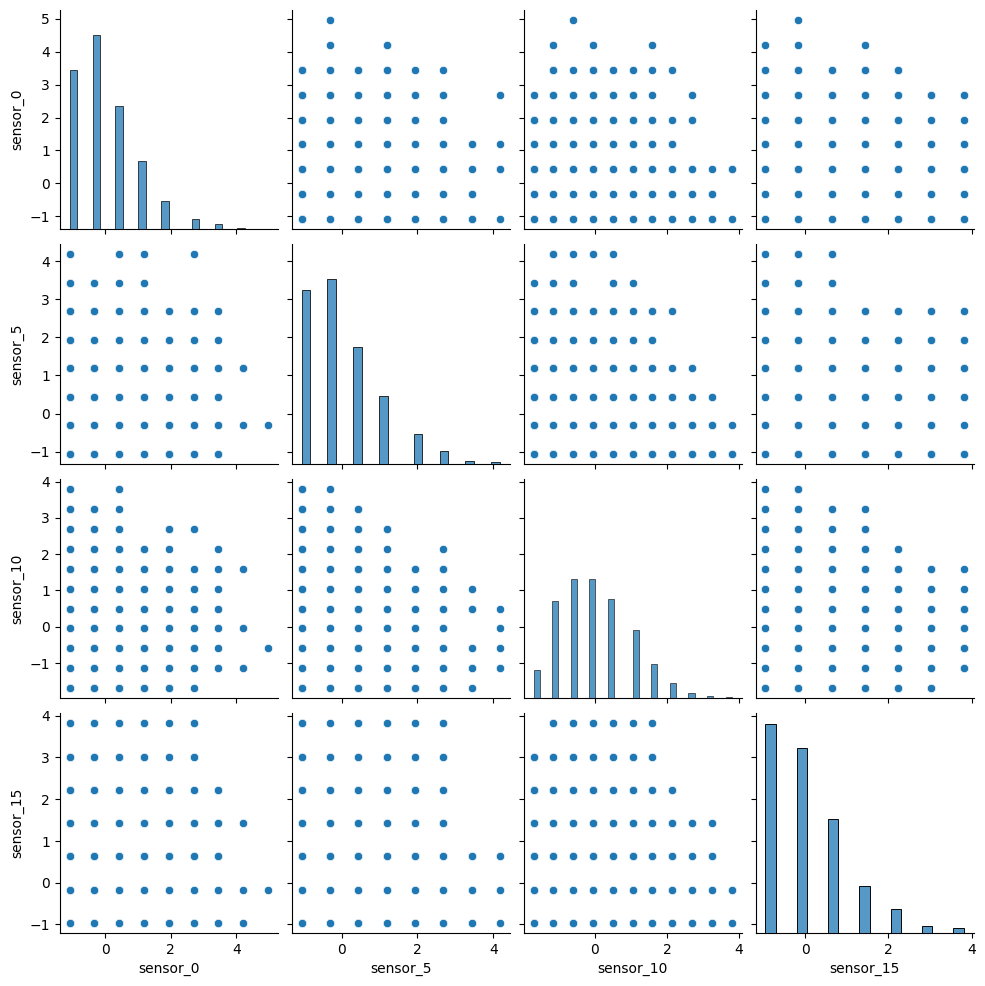

In [28]:
selected_sensors = ['sensor_0', 'sensor_5', 'sensor_10', 'sensor_15']
sns.pairplot(df[selected_sensors])
plt.show()


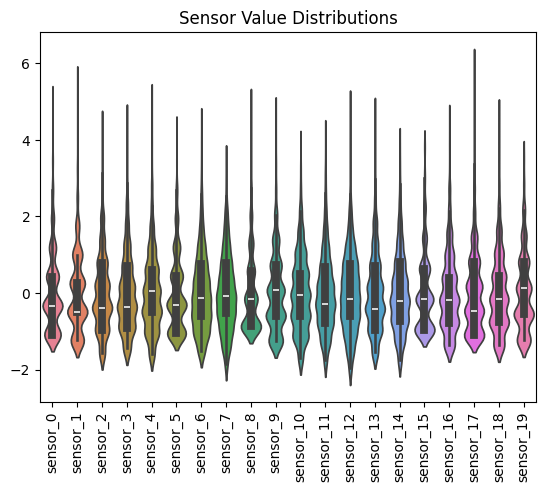

In [29]:
sns.violinplot(data=df[sensor_cols])
plt.xticks(rotation=90)
plt.title('Sensor Value Distributions')
plt.show()


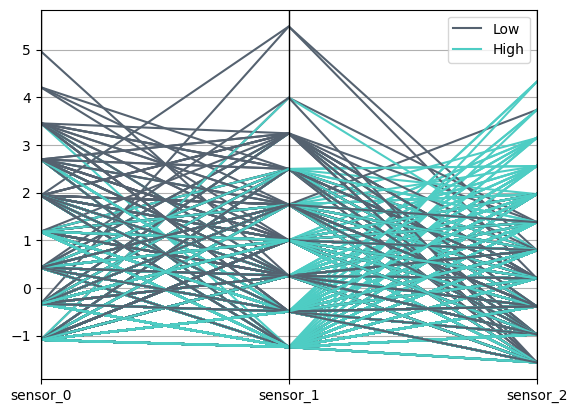

In [31]:
from pandas.plotting import parallel_coordinates
df_temp = df.copy()
df_temp['Parcel_Class'] = df['parcel_0'].apply(lambda x: 'Low' if x < 0.5 else 'High')
parallel_coordinates(df_temp[['sensor_0', 'sensor_1', 'sensor_2', 'Parcel_Class']], 'Parcel_Class', color=('#556270', '#4ECDC4'))
plt.show()


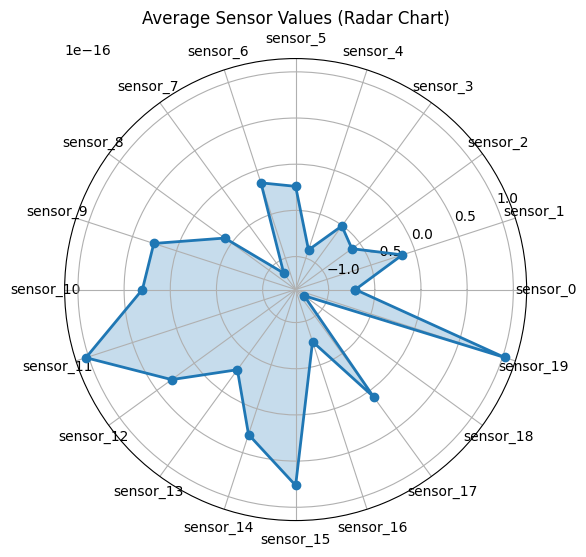

In [33]:
import numpy as np
import matplotlib.pyplot as plt

avg_values = df[sensor_cols].mean()
labels = np.array(sensor_cols)
stats = avg_values.values

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
stats = np.concatenate((stats, [stats[0]]))  # close the circle
angles += angles[:1]  # close the circle

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)

# ✅ Only set the original 20 angles for labels
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

plt.title('Average Sensor Values (Radar Chart)')
plt.show()



In [34]:
from sklearn.model_selection import train_test_split

X = df[sensor_cols]       # All your sensor columns
y = df['parcel_0']        # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {acc * 100:.2f}%")


Logistic Regression Accuracy: 85.75%


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc * 100:.2f}%")


Random Forest Accuracy: 88.00%


In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_acc * 100:.2f}%")


KNN Accuracy: 86.00%


In [38]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


[[114  30]
 [ 18 238]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       144
           1       0.89      0.93      0.91       256

    accuracy                           0.88       400
   macro avg       0.88      0.86      0.87       400
weighted avg       0.88      0.88      0.88       400

